# Importing Required Libraries and Reddit API Credentials

In [1]:
#Importing PRAW Module
import praw  

# Inserting Reddit API Credentials

In [2]:
# Creating Reddit instance with provided credentials
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" 
reddit = praw.Reddit(
    # Inserting client ID
    client_id="D87PHt7RBWFy1jf1-EquRw",  
    # Inserting client secret
    client_secret="CxCt7CzuY0w7YostkdaY9kBB2h4NRg", # Inserting client secret
    user_agent=user_agent
)

In [3]:
# Importing Pandas as pd
import pandas as pd  
# Importing numpy as np
import numpy as np   
 # RegEx : Regular expression
import re           

# Rising topics

In [5]:
# Hot new rising topics

headlines = set()
# Iterating through submissions in the hot section of the Food subreddit
for submission in reddit.subreddit("Food").hot(limit=None):
    print(submission.title)  #Subreddit Title
    print(submission.id)     #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

This year we're supporting Campaign For Kids. They're a Kings County Nova Scotia Charity rising money this April through their event Burger Wars. Check out the post here for more information.
1bnk4um
Sun_Beams
1711389345.0
23
0.82
/r/burgerwars/comments/1bnauvh/burger_wars_2024_a_flavorful_showdown/
0


# Retrieving the titles of hot posts in the Tollywood subreddit

In [6]:
# Retreving the tittle of hot posts in Food subreddit.
headlines = set()
for submission in reddit.subreddit("Food").hot(limit=None): 
    headlines.add(submission.title)
# Printing the no of Unique Headlines
print(len(headlines)) 

929


In [7]:
#Create a dataframe from the scrapped data 
Food_df = pd.DataFrame(headlines)

In [8]:
# Printing the Top Five Rows
Food_df.head()

,0
0,[i ate] Burger with 3 1/2 lb Patties with Ched...
1,"[homemade] Bagels and lox with fried eggs, cap..."
2,Meatballs in tomato sauce [homemade]
3,[Homemade] Beef Soup
4,Lamb leg roast [homemade]


In [9]:
# Printing the Column Names.
Food_df.columns

RangeIndex(start=0, stop=1, step=1)

In [10]:
# Adding Column Names
Food_df.columns = ['Titles'] 

In [11]:
# Printing top Five Rows
Food_df.head() 

,Titles
0,[i ate] Burger with 3 1/2 lb Patties with Ched...
1,"[homemade] Bagels and lox with fried eggs, cap..."
2,Meatballs in tomato sauce [homemade]
3,[Homemade] Beef Soup
4,Lamb leg roast [homemade]


In [12]:
 # Printing the Sum of Duplicates.
Food_df.Titles.duplicated().sum()  

0

# Data Cleaning

In [13]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
Food_df["Titles"]= Food_df["Titles"].apply(cleanTxt)

#Show the clean text
Food_df.head()

,Titles
0,[i ate] Burger with 3 1/2 lb Patties with Ched...
1,"[homemade] Bagels and lox with fried eggs, cap..."
2,Meatballs in tomato sauce [homemade]
3,[Homemade] Beef Soup
4,Lamb leg roast [homemade]


# Remove emoji and Unicode from the reddit data.

In [14]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Food_df["Titles"]= Food_df["Titles"].apply(remove_emoji)

#Show the clean text
Food_df.head()

,Titles
0,[i ate] Burger with 3 1/2 lb Patties with Ched...
1,"[homemade] Bagels and lox with fried eggs, cap..."
2,Meatballs in tomato sauce [homemade]
3,[Homemade] Beef Soup
4,Lamb leg roast [homemade]


In [15]:
!pip install textblob

In [16]:
## Importing TextBlob
from textblob import TextBlob 
from wordcloud import WordCloud, STOPWORDS  

# Sentiment Analysis

In [17]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Food_df['Subjectivity'] = Food_df['Titles'].apply(getSubjectivity)
Food_df['Polarity'] = Food_df['Titles'].apply(getPolarity)

#Now display data
Food_df.head()

,Titles,Subjectivity,Polarity
0,[i ate] Burger with 3 1/2 lb Patties with Ched...,0.334402,-0.174145
1,"[homemade] Bagels and lox with fried eggs, cap...",0.000000,0.000000
2,Meatballs in tomato sauce [homemade],0.000000,0.000000
3,[Homemade] Beef Soup,0.000000,0.000000
4,Lamb leg roast [homemade],0.000000,0.000000


# Grouping Polarity into Sentiment Categories

In [18]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
Food_df["Insight"] = Food_df["Polarity"].apply(getInsight)

Food_df.head(50)


,Titles,Subjectivity,Polarity,Insight
0,[i ate] Burger with 3 1/2 lb Patties with Ched...,0.334402,-0.174145,Negative
1,"[homemade] Bagels and lox with fried eggs, cap...",0.000000,0.000000,Neutral
2,Meatballs in tomato sauce [homemade],0.000000,0.000000,Neutral
3,[Homemade] Beef Soup,0.000000,0.000000,Neutral
4,Lamb leg roast [homemade],0.000000,0.000000,Neutral
5,"[homemade] prosciutto wrapped asparagus, slow ...",0.525000,0.025000,Positive
6,[homemade] tiramisu,0.000000,0.000000,Neutral
7,[Homemade] Pork chops with asparagus and cream...,0.000000,0.000000,Neutral
8,"[Homemade]chicken satay with peanut sauce, ric...",0.000000,0.000000,Neutral
9,[homemade] potato dumpling mac and cheese with...,0.000000,0.000000,Neutral


In [20]:
# Importing seaborn Package
import seaborn as sns 
import warnings 
from wordcloud import WordCloud, STOPWORDS
# Importing matplotlib.pyplot
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

# Visualizing Sentiment Analysis

# Plotting Sentiment Scores

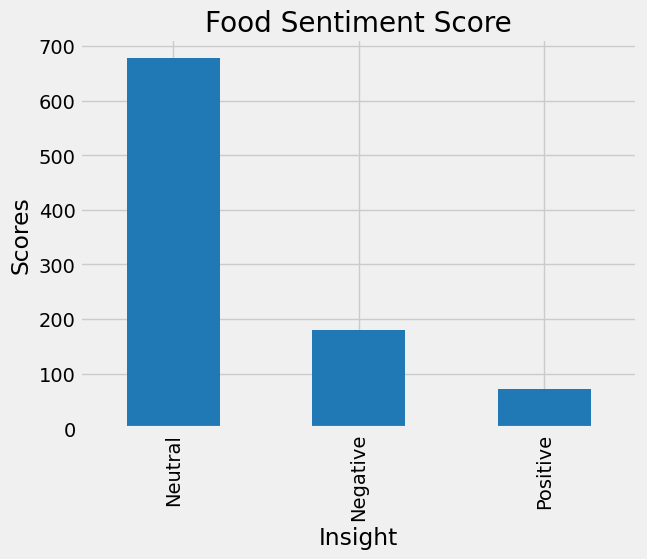

In [21]:
#Plot the values count of sentiment
plt.title("Food Sentiment Score")
plt.xlabel("Sentiment") # X-axis
plt.ylabel("Scores") # Y-axis
plt.rcParams["figure.figsize"] = (8,8) # Figure Size
Food_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Generating Word Clouds

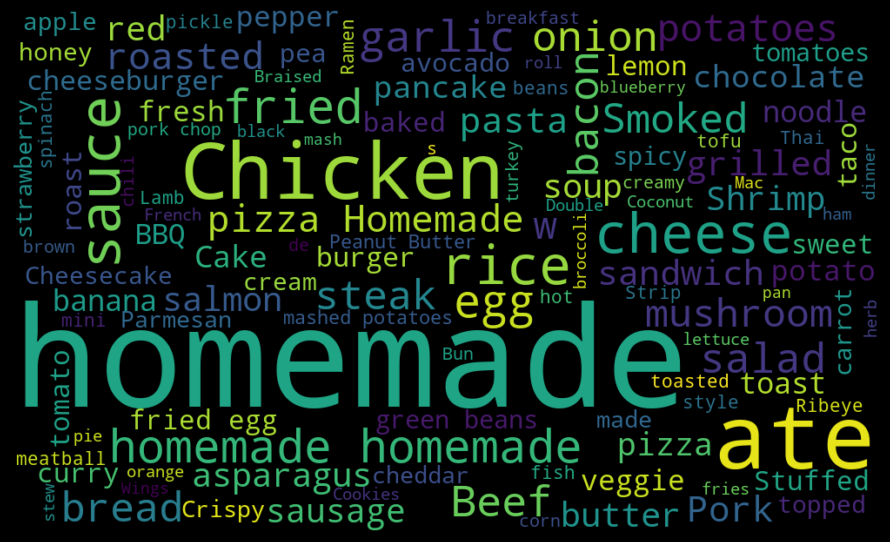

In [23]:
text = ' '.join( [twts for twts in Food_df['Titles']] ) # To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 120,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");